
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


# **Loading the dataset**

In [ ]:
# To read data from titanic.csv
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/SMAI2/titanic.csv')
data

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data cleaning**

In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


I have made the following changes to the data:

**1. Dealing with Missing Values**


1.   **Age**
      *   For Age, 171 out of 891 values are missing. Hence the percentage of missing records in Age comes out to be 19.87%.
      *   Hence to deal with missing values, I have use the **mean** of entire data set as a replacement of the missing values.

2.   **Embarked**
      *   For Embarked, 2 out of 891 values are missing. Hence the percentage of missing records in Embarked comes out to be 0.22%.   
      *   As only small % of values are missing, hence to deal with it I will replace those missing values with the port where **majority** of the people boarded.


**2. Drop Columns**

1.   **Cabin**
      *   For Cabin, 687 out of 891 values are missing. Hence the percentage of missing records in Cabin comes out to be 77.10%. 
      *   As most of the data in this feature is missing, using this variable for prediction is probably not wise. Hence I will **drop** this feature from the model.

2.   Droping features such as **Name**, **PassengerId** and **Ticket** as using this features for prediction is probably of no use.


**3. Creating dummies for categorical features**

1.   **Pclass**

      * Pclass contains three values (i.e 1, 2, 3). Hence creating 3 seperate feature Pclass_1, Pclass_2 and Pclass_3.   


2.   **Embarked**

      * Embarked contains three values (i.e C, Q, S). Hence creating 3 seperate features Embarked_C, Embarked_Q and Embarked_S.

3.     **Sex**
      * Sex contains two values (i.e male, female). Hence creating 2 seperate features Sex_male and Sex_female and further droping Sex_female.


In [ ]:
import pandas as pd

# Dealing with Missing Values
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

# dropping Cabin, PassengerId, Name, Ticket
data.drop('Cabin', axis=1, inplace=True)
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)

# Creating dummies for categorical features
data = pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])
data.drop('Sex_female', axis=1, inplace=True)
data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.000000,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.000000,0,0,8.0500,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,0,1,1
887,1,19.000000,0,0,30.0000,1,0,0,0,0,1,0
888,0,29.699118,1,2,23.4500,0,0,1,0,0,1,0
889,1,26.000000,0,0,30.0000,1,0,0,1,0,0,1


In [ ]:
print(data.isnull().sum())

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64


# **Splitting into training and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data.drop(['Survived'], axis = 1)
Y = data['Survived']

X = np.array(X)
Y = np.array(Y)

# spliting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=49)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(11, 623) (11, 268) (623,) (268,)


# **Logistic regression**

Streaming output truncated to the last 5000 lines.
Updation in Cost after iteration no 450000: 0.451824
Updation in Cost after iteration no 450010: 0.451824
Updation in Cost after iteration no 450020: 0.451824
Updation in Cost after iteration no 450030: 0.451824
Updation in Cost after iteration no 450040: 0.451824
Updation in Cost after iteration no 450050: 0.451824
Updation in Cost after iteration no 450060: 0.451824
Updation in Cost after iteration no 450070: 0.451824
Updation in Cost after iteration no 450080: 0.451824
Updation in Cost after iteration no 450090: 0.451824
Updation in Cost after iteration no 450100: 0.451824
Updation in Cost after iteration no 450110: 0.451824
Updation in Cost after iteration no 450120: 0.451824
Updation in Cost after iteration no 450130: 0.451824
Updation in Cost after iteration no 450140: 0.451824
Updation in Cost after iteration no 450150: 0.451824
Updation in Cost after iteration no 450160: 0.451824
Updation in Cost after iteration no 450170: 0.45

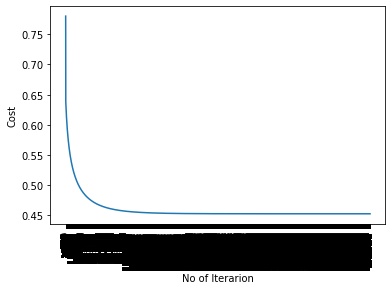

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
x_train = X_train
x_test = X_test
y_train = Y_train
y_test = Y_test

xtrainSize = x_train.shape

numofiterations = 500000
learningrate = 0.001

def sigmoid(x):
  z = 1 / (1 + np.exp(-x))
  return z
 
def isTrue(val):
  return val > 0.5

def predict1(z,Y_predict):
    Y_predict_copy = Y_predict
    size_Z = z.shape
    i=0
    while i <= size_Z[1]-1:
      Y_predict_copy[0,i] = 0
      if isTrue(z[0,i]):
        Y_predict_copy[0,i] = 1

      i += 1

    return Y_predict_copy 

def predict(w,bias,x_test_train):
    z = sigmoid(np.dot(w.T,x_test_train)+bias)
    xtestdim = x_test_train.shape
    Y_predict = np.zeros((1,xtestdim[1]))
    Y_prediction = predict1(z,Y_predict)
    return Y_prediction
 
def derivativefind(sigM):
    diff = sigM-y_train
    dB = np.sum(diff)/xtrainSize[1]
    dW = (np.dot(x_train,((diff).T)))/xtrainSize[1]
    return dB,dW 


def calculateLossNCost(sig):
  loss = -y_train*np.log(sig)-(1-y_train)*np.log(1-sig)
  cost = (np.sum(loss))/xtrainSize[1]
  return loss, cost


def propagation(w,b):
    gradients = {}
    z = np.dot(w.T,x_train) + b
    sig = sigmoid(z)
    loss, cost = calculateLossNCost(sig)
    db,dw = derivativefind(sig)
    gradients["DW"] = dw
    gradients["DB"] = db
    return cost,gradients
 
def plot(index,cost_list2):
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.ylabel("Cost")
    plt.xlabel("No of Iterarion")
    plt.show()

def isTen(i):
  return i%10 == 0

def update(w, b):
    cost_list = list()
    cost_list2 = list()
    index = list()
    parameters = {}
    i = 0
    while (i <= numofiterations-1):
        
        cost,gradients = propagation(w,b)
        cost_list.append(cost)
        
        w -= learningrate * gradients["DW"]
        b -= learningrate * gradients["DB"]
        if isTen(i):
            cost_list2.append(cost)
            index.append(i)
            print ("Updation in Cost after iteration no %i: %f" %(i, cost))
        i = i+1    

    parameters["W"] = w
    parameters["B"] = b
    return parameters, gradients, cost_list, index, cost_list2

bias=0.0 
w=np.full((xtrainSize[0],1),0.01)

parameters, gradients, cost_list, index, cost_List_Plot = update(w, bias)

plot(index,cost_List_Plot)

y_predict_test = predict(parameters["W"],parameters["B"],x_test)
y_predict_train = predict(parameters["W"],parameters["B"],x_train)
    
scoreTrain = 100 - np.mean(np.abs(y_predict_train - y_train)) * 100
scoreTest = 100 - np.mean(np.abs(y_predict_test - y_test)) * 100

y_predict = y_predict_test
y_predict_test = y_predict_test.flatten()

# **Accuracy and Metrics**

In [ ]:
# Print train/test Accuracy
print("train accuracy: ", scoreTrain)
print("test accuracy: ", scoreTest)

train accuracy:  79.61476725521669
test accuracy:  80.97014925373134


In [ ]:
# Confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

print("Confusion Matrix is")
cm = metrics.confusion_matrix(Y_test, y_predict_test)
cm

Confusion Matrix is


array([[151,  27],
       [ 24,  66]])

Heat Map
AxesSubplot(0.125,0.125;0.62x0.755)


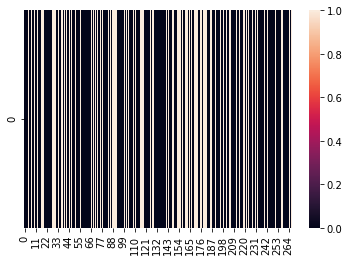

In [ ]:
import seaborn as sbn
print("Heat Map")
print(sbn.heatmap(y_predict))

In [ ]:
from sklearn import metrics
print("Classifiction Report is")
classificationReport = metrics.classification_report(Y_test,y_predict_test)
print(classificationReport)

Classifiction Report is
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       178
           1       0.71      0.73      0.72        90

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

